Aynur Rahimova

https://www.kaggle.com/code/santoshraii/spotify-50-songs-prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Given data is about the top 50 songs of 2019 .let us try to predict that a song will be more popular or less.

we will be using different model for predict 

In [33]:
import plotly.express as px
import seaborn as sns           
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [3]:
data = pd.read_csv("C:/Users/Cursist/handson-ml3/spot_song_pred/top50.csv",encoding='latin-1')

In [4]:
data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


Preprocessing

In [6]:
# me # checking duplicate rows
duplicate_rows = data.duplicated()
duplicates = data[duplicate_rows]
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, Track.Name, Artist.Name, Genre, Beats.Per.Minute, Energy, Danceability, Loudness..dB.., Liveness, Valence., Length., Acousticness.., Speechiness., Popularity]
Index: []


In [7]:
data = data.drop(["Unnamed: 0","Track.Name"],axis=1)

In [8]:
data.head()

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


.Now we divide the popularity column into two part using    quantile cut of pandas 

.Reason we use quantile cut is because it divibe the data   based on the distribution of data rather than just dividing it into two part.

Label it as less popular or more popular.

Text(0.5, 1.0, 'Correlation Matrix for Data')

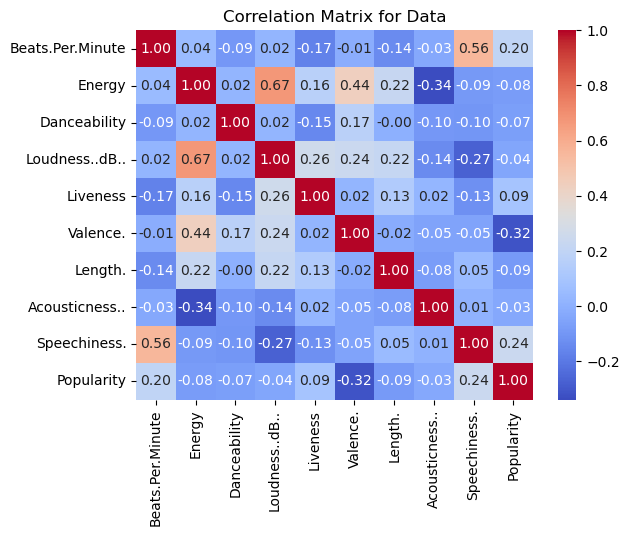

In [9]:
# me #correlation matrix
num_features = data[["Beats.Per.Minute", "Energy", "Danceability", "Loudness..dB..", "Liveness", "Valence.", "Length.", "Acousticness..", "Speechiness.", "Popularity"]]
sns.heatmap(num_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Data')

In [10]:
data["Popularity"] = pd.qcut(data["Popularity"],q=2,labels=[0,1])

In [11]:
data.head()

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,0
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,1
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,0
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,0
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,1


One-Hot Encoding

In [12]:
def onehot_encode(df,column,prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column],prefix=prefix)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(column,axis=1)
    return df

In [13]:
data = onehot_encode(data,"Genre","genre")
data = onehot_encode(data,"Artist.Name","artist")

In [12]:
data

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,...,artist_Post Malone,artist_ROSALÍA,artist_Sam Smith,artist_Sech,artist_Shawn Mendes,artist_Taylor Swift,artist_The Chainsmokers,artist_Tones and I,artist_Y2K,artist_Young Thug
0,117,55,76,-6,8,75,191,4,3,0,...,False,False,False,False,True,False,False,False,False,False
1,105,81,79,-4,8,61,302,8,9,1,...,False,False,False,False,False,False,False,False,False,False
2,190,80,40,-4,16,70,186,12,46,0,...,False,False,False,False,False,False,False,False,False,False
3,93,65,64,-8,8,55,198,12,19,0,...,False,False,False,False,False,False,False,False,False,False
4,150,65,58,-4,11,18,175,45,7,1,...,True,False,False,False,False,False,False,False,False,False
5,102,68,80,-5,9,84,220,9,4,0,...,False,False,False,False,False,False,False,False,False,False
6,180,64,75,-6,7,23,131,2,29,1,...,False,False,False,False,False,False,False,False,False,False
7,111,68,48,-5,8,35,202,15,9,1,...,False,False,True,False,False,False,False,False,False,False
8,136,62,88,-6,11,64,157,5,10,0,...,False,False,False,False,False,False,False,False,False,False
9,135,43,70,-11,10,56,194,33,38,1,...,False,False,False,False,False,False,False,False,False,False


In [14]:
data = data.astype(int)

In [14]:
data

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,...,artist_Post Malone,artist_ROSALÍA,artist_Sam Smith,artist_Sech,artist_Shawn Mendes,artist_Taylor Swift,artist_The Chainsmokers,artist_Tones and I,artist_Y2K,artist_Young Thug
0,117,55,76,-6,8,75,191,4,3,0,...,0,0,0,0,1,0,0,0,0,0
1,105,81,79,-4,8,61,302,8,9,1,...,0,0,0,0,0,0,0,0,0,0
2,190,80,40,-4,16,70,186,12,46,0,...,0,0,0,0,0,0,0,0,0,0
3,93,65,64,-8,8,55,198,12,19,0,...,0,0,0,0,0,0,0,0,0,0
4,150,65,58,-4,11,18,175,45,7,1,...,1,0,0,0,0,0,0,0,0,0
5,102,68,80,-5,9,84,220,9,4,0,...,0,0,0,0,0,0,0,0,0,0
6,180,64,75,-6,7,23,131,2,29,1,...,0,0,0,0,0,0,0,0,0,0
7,111,68,48,-5,8,35,202,15,9,1,...,0,0,1,0,0,0,0,0,0,0
8,136,62,88,-6,11,64,157,5,10,0,...,0,0,0,0,0,0,0,0,0,0
9,135,43,70,-11,10,56,194,33,38,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#model_features = ["Valence.", "Length.", "Liveness", "Energy", "Speechiness."]

spliting and scaling

In [15]:
# me # assigning approximately high correlated features to x (model_features from above)
x = data.drop(["Beats.Per.Minute", "Danceability", "Loudness..dB..", "Acousticness..", "Popularity"], axis=1)
y = data["Popularity"]


In [16]:
# me # to check is target balanced or imbalanced
y.value_counts()

Popularity
0    26
1    24
Name: count, dtype: int64

In [ ]:
# original
#y = data.loc[:,"Popularity"]
#x = data.drop("Popularity", axis=1)

In [17]:
# me #log1 transformation
x[["Length.", "Liveness", "Speechiness."]] = np.log1p(x[["Length.", "Liveness", "Speechiness."]])

array([[<Axes: title={'center': 'Length.'}>,
        <Axes: title={'center': 'Liveness'}>],
       [<Axes: title={'center': 'Speechiness.'}>, <Axes: >]], dtype=object)

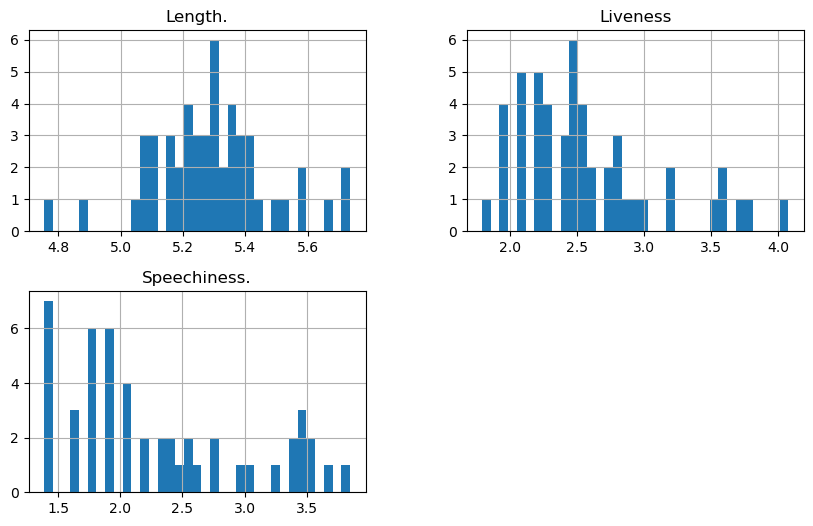

In [ ]:
# me # histogram for log1 transformed features
x[["Length.", "Liveness", "Speechiness."]].hist(bins= 35, figsize= (10,6))

In [19]:
# original
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [20]:
# original
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 20)

Modeling and Training.
we will use 5 different model for training

In [21]:
# original
log_model1 =LogisticRegression()
knn_model2 =KNeighborsClassifier()
dt_model3 =DecisionTreeClassifier()
mlp_model4 =MLPClassifier()
svm_model5 =SVC()

In [22]:
# original
log_model1.fit(x_train,y_train)
knn_model2.fit(x_train,y_train)
dt_model3.fit(x_train,y_train)
mlp_model4.fit(x_train,y_train)
svm_model5.fit(x_train,y_train)

c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC()

In [23]:
# original
log_acc = log_model1.score(x_test,y_test)
knn_acc = knn_model2.score(x_test,y_test)
dt_acc = dt_model3.score(x_test,y_test)
mlp_acc = mlp_model4.score(x_test,y_test)
svm_acc = svm_model5.score(x_test,y_test)

In [24]:
# original
print("Logistic Accuracy :",log_acc)
print("KNN Accuracy :",knn_acc)
print("Decision Tree Accuracy:",dt_acc)
print("MLP Accuracy :",mlp_acc)
print("svm Accuracy :",svm_acc)

Logistic Accuracy : 0.6
KNN Accuracy : 0.5333333333333333
Decision Tree Accuracy: 0.5333333333333333
MLP Accuracy : 0.4666666666666667
svm Accuracy : 0.7333333333333333


In [25]:
# me 
models = {
    "log_model1": LogisticRegression(
        random_state=42,       
        max_iter=500,         
        solver='liblinear'    
    ),
    "knn_model2": KNeighborsClassifier(
        n_neighbors=5,          
        weights='uniform',      
        algorithm='auto'        
    ),
    "dt_model3": DecisionTreeClassifier(
        random_state=42,      
        max_depth=None,       
        min_samples_split=2,   
        min_samples_leaf=1    
    ),
    "mlp_model4": MLPClassifier(
        random_state=42,       
        hidden_layer_sizes=(100,), 
        activation='relu',       
        solver='adam',          
        max_iter=200            
    ),
    "svm_model5": SVC(
        random_state=42,       
        C=1.0,                 
        kernel='rbf',           
        gamma='scale'          
    )
}

In [26]:
# me # calculating accuracy and f1_score
model_names = []
F1_scores = []
for name, model in models.items():
    
    model.fit(x_train, y_train)

    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)

    y_pred = model.predict(x_test)
    
    # evaluating
    f1 = f1_score(y_test, y_pred, average='micro')    # due to the fact that y is not imbalanced i use average= "macro"

    model_names.append(name)  # i will use to plot results
    F1_scores.append(f1)      # the same reason
            
    print(f"{name} - F1_score: {f1:.4f}"
          f"\n{name} - Score_train: {score_train:.4f}, Score_test: {score_test:.4f} \n")

log_model1 - F1_score: 0.6667
log_model1 - Score_train: 1.0000, Score_test: 0.6667 

knn_model2 - F1_score: 0.5333
knn_model2 - Score_train: 0.5143, Score_test: 0.5333 

dt_model3 - F1_score: 0.5333
dt_model3 - Score_train: 1.0000, Score_test: 0.5333 

mlp_model4 - F1_score: 0.7333
mlp_model4 - Score_train: 1.0000, Score_test: 0.7333 

svm_model5 - F1_score: 0.7333
svm_model5 - Score_train: 1.0000, Score_test: 0.7333 



c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
# original results

# Logistic Accuracy : 0.7333333333333333    
# KNN Accuracy : 0.5333333333333333
# Decision Tree Accuracy: 0.4
# MLP Accuracy : 0.6
# svm Accuracy : 0.7333333333333333

In [28]:
log_acc_orig = 0.7333333333333333
knn_acc_orig = 0.5333333333333333
dt_acc_orig = 0.4
mlp_acc_orig = 0.6
svm_acc_orig = 0.7333333333333333

In [29]:
# me # comparison of original and my results
models_list = ["Logistic Regression", "K-Nearest Neighbor", "Decision Tree", "Neural Network", "SVM"]
result1 = [log_acc, knn_acc, dt_acc, mlp_acc, svm_acc]                                             # my results
result2 = [log_acc_orig, knn_acc_orig, dt_acc_orig, mlp_acc_orig, svm_acc_orig]                    # original results

data = {
    "Model": models_list * 2,  
    "Accuracy": result1 + result2,  
    "Result Set": ["My results"] * len(models_list) + ["Original results"] * len(models_list)
}

fig = px.bar(
    data,
    x="Model",
    y="Accuracy",
    color="Result Set",
    barmode="group", 
    labels={"x": "Model", "y": "Accuracy"},
    title="Model Accuracy Comparison"
)

fig.show()

In [30]:
# me 
fig = px.bar(
    x=model_names, 
    y=F1_scores,    
    color=model_names,  
    labels={"x": "Model", "y": "F1 Score"},  
    title="Model F1 Score Comparison" 
)

fig.show()

In [31]:
# me # cross validation
cv_folds = 10
model_names = []
F1_scores_cr = []
for name, model in models.items():
    model.fit(x_train, y_train)

    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)

    pred_y_train = model.predict(x_train)
    pred_y_test = model.predict(x_test)

    # cross-validation for F1_score
    f1_cr = cross_val_score(model, x, y, cv=cv_folds, scoring= "f1_micro")

    model_names.append(name)  # i will use to plot results
    F1_scores_cr.append(f1_cr.mean())      # the same reason
    
    print(f"{name} Cross-Validation Results:")
    print(f" F1 score_cr: {f1_cr.mean():.4f}")
   
   
   

log_model1 Cross-Validation Results:
 F1 score_cr: 0.6000
knn_model2 Cross-Validation Results:
 F1 score_cr: 0.5200
dt_model3 Cross-Validation Results:
 F1 score_cr: 0.4800


c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_

mlp_model4 Cross-Validation Results:
 F1 score_cr: 0.5600
svm_model5 Cross-Validation Results:
 F1 score_cr: 0.6200


c:\Users\Cursist\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
# me # comparison of F1 scores with and without cross validation
result1 = F1_scores                                           
result2 = F1_scores_cr     

data = {
    "Model": models_list * 2,  
    "F1 score": result1 + result2,  
    "Result Set": ["F1 score without cross_val"] * len(models_list) + ["F1 score cross_val"] * len(models_list)
}

fig = px.bar(
    data,
    x="Model",
    y="F1 score",
    color="Result Set",
    barmode="group", 
    labels={"x": "Model", "y": "F1 score"},
    title="Model f1 score Comparison with and without cross validation"
)

fig.show()